In [18]:
import random
import urllib
import numpy as np
import pandas as pd

import cv2
import seaborn as sns
from matplotlib import rc 
import matplotlib.pyplot as plt
rc("font", family="Malgun Gothic ") # Windows : Malgun Gothic 
get_ipython().run_line_magic("matplotlib", "inline")

# ingnore warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# preprocessed data load
data = pd.read_csv('./data/zzimcong_prep.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390569 entries, 0 to 390568
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            390569 non-null  int64  
 1   id                    390569 non-null  int64  
 2   name                  390569 non-null  object 
 3   brand_id              390569 non-null  int64  
 4   brand_name            390569 non-null  object 
 5   parent_category_id    390569 non-null  float64
 6   parent_category_name  390569 non-null  object 
 7   category_id           390569 non-null  float64
 8   category_id.1         390569 non-null  object 
 9   price                 390569 non-null  int64  
 10  image_url             390569 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 32.8+ MB


----------

# Image 전처리

In [6]:
data['image_url']

0         https://hohodangstore.co.kr/web/product/medium...
1         https://hohodangstore.co.kr/web/product/medium...
2         https://hohodangstore.co.kr/web/product/medium...
3         https://hohodangstore.co.kr/web/product/medium...
4         https://hohodangstore.co.kr/web/product/medium...
                                ...                        
390564    https://shopping-phinf.pstatic.net/main_836577...
390565    https://shopping-phinf.pstatic.net/main_836582...
390566    https://shopping-phinf.pstatic.net/main_836583...
390567    https://shopping-phinf.pstatic.net/main_836582...
390568    https://www.soim.co.kr/shopimages/ebbda12/0680...
Name: image_url, Length: 390569, dtype: object

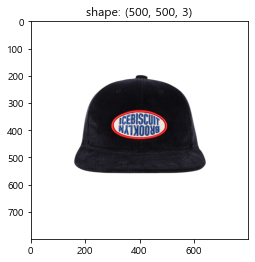

In [49]:
# image 불러오기

def img_sample():
    sample = random.choices(population=data['image_url'].values)
    url = sample[0]
    req = urllib.request.urlopen(url)

    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

plt.title(f'shape: {img_sample().shape}')
plt.imshow(img_sample());

## 1. resize

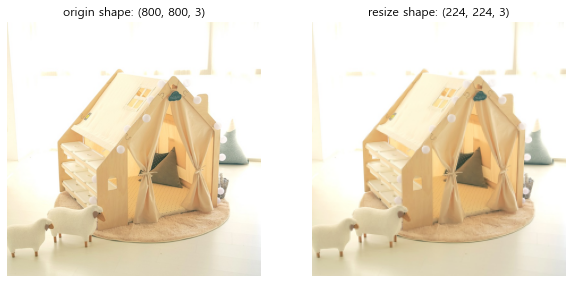

In [27]:
dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f'origin shape: {img.shape}')
plt.axis(False);

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title(f'resize shape: {dst.shape}')
plt.axis(False);



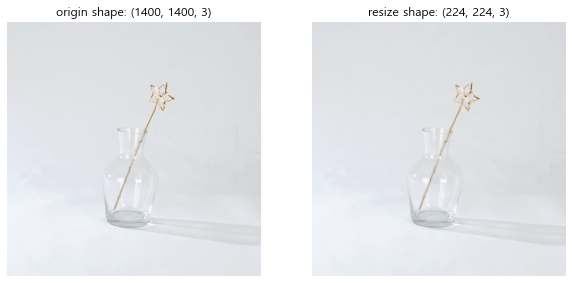

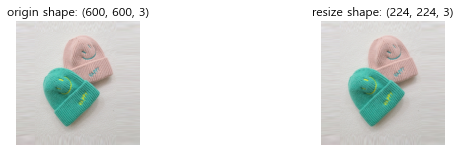

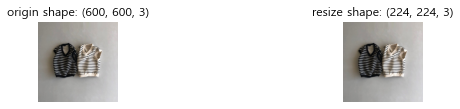

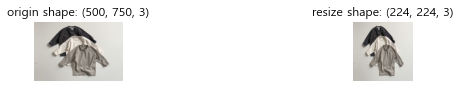

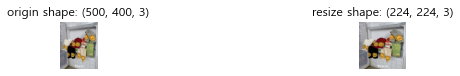

In [40]:
for i in range(5):
    # 이미지 sampling
    sample = random.choices(population=data['image_url'].values)
    url = sample[0]
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # resize
    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    
    # visualization
    plt.figure(figsize=(10, 5))

    plt.subplot(i+1, 2, 1)
    plt.imshow(img)
    plt.title(f'origin shape: {img.shape}')
    plt.axis(False);

    plt.subplot(i+1, 2, 2)
    plt.imshow(dst)
    plt.title(f'resize shape: {dst.shape}')
    plt.axis(False);

- padding

In [113]:
def compare_image(img):

    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'origin: {img.shape}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title(f'resize: {dst.shape}' )
    plt.axis('off')

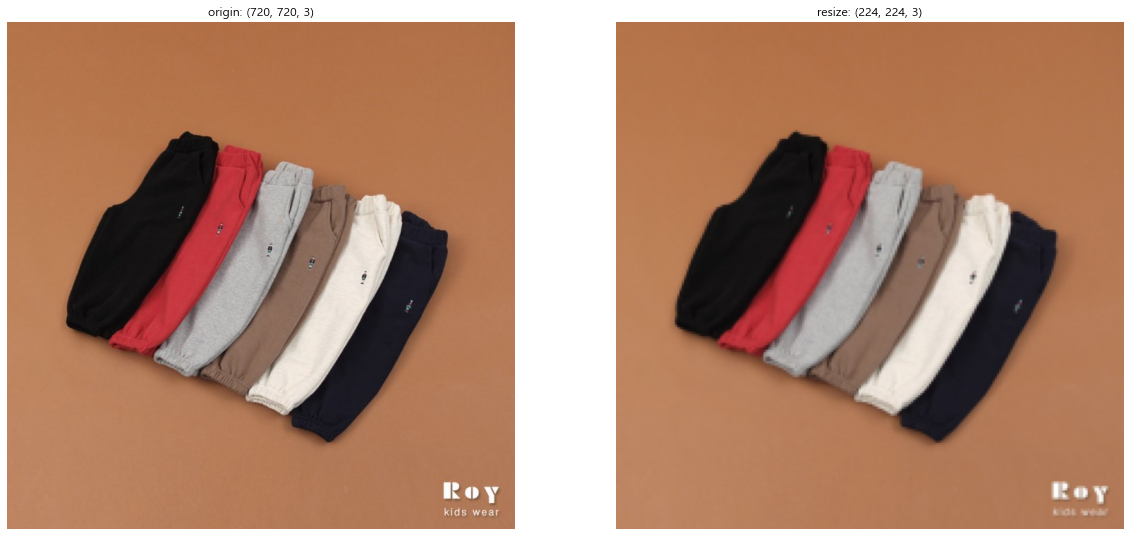

In [114]:
compare_image(img_sample())

https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/

- long이미지 padding

(600, 600, 3)

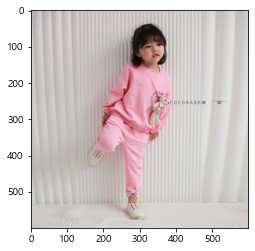

In [57]:
img = img_sample()
diff = abs(img.shape[0] - img.shape[1])
if img.shape[0] > img.shape[1]:
    dst = cv2.copyMakeBorder(img, 0, 0, int(diff/2), int(diff/2), cv2.BORDER_CONSTANT)
else:
    dst = cv2.copyMakeBorder(img, int(diff/2), int(diff/2),0,0, cv2.BORDER_CONSTANT)
plt.imshow(dst)
dst.shape

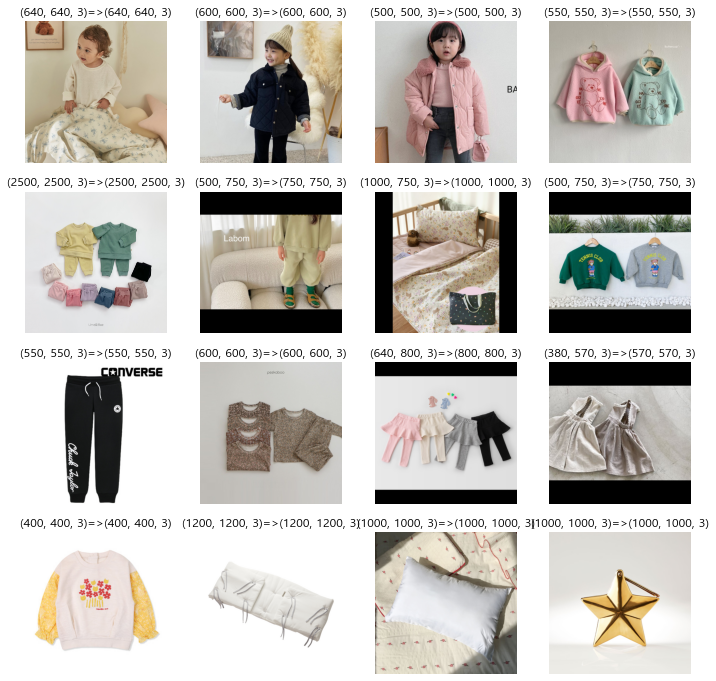

In [79]:
plt.figure(figsize=(12,12))

for i in range(4*4):
    # 이미지 샘플링
    img = img_sample() 
    
    # diff(w - h)구하고 차이만큼 padding 
    diff = abs(img.shape[0] - img.shape[1]) 
    if img.shape[0] > img.shape[1]:
        dst = cv2.copyMakeBorder(img, 0, 0, int(diff/2), int(diff/2), cv2.BORDER_CONSTANT)
    else:
        dst = cv2.copyMakeBorder(img, int(diff/2), int(diff/2),0,0, cv2.BORDER_CONSTANT)
        
    # visualization
    ax = plt.subplot(4, 4, i + 1)
    plt.title(f'{img.shape}=>{dst.shape}')
    plt.axis(False)
    plt.imshow(dst);